# Lab 7 - Recurrent Neural Networks

## Eli Laird

### Introduction

In this lab, I will be using Recurrent Neural Networks to classify news headlines into their respective topics. The dataset I am using is provided by news website _HuffPost_ [1].   

### Business Understanding

### Data Preparation

In [16]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline


data = pd.read_json("./News_Category_Dataset_v2.json", lines=True)
print("Data Shape: ", data.shape)
data.head()

Data Shape:  (200853, 6)


,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [24]:
#remove unused features
data = data[['category','headline']]
data.head()

,category,headline
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...


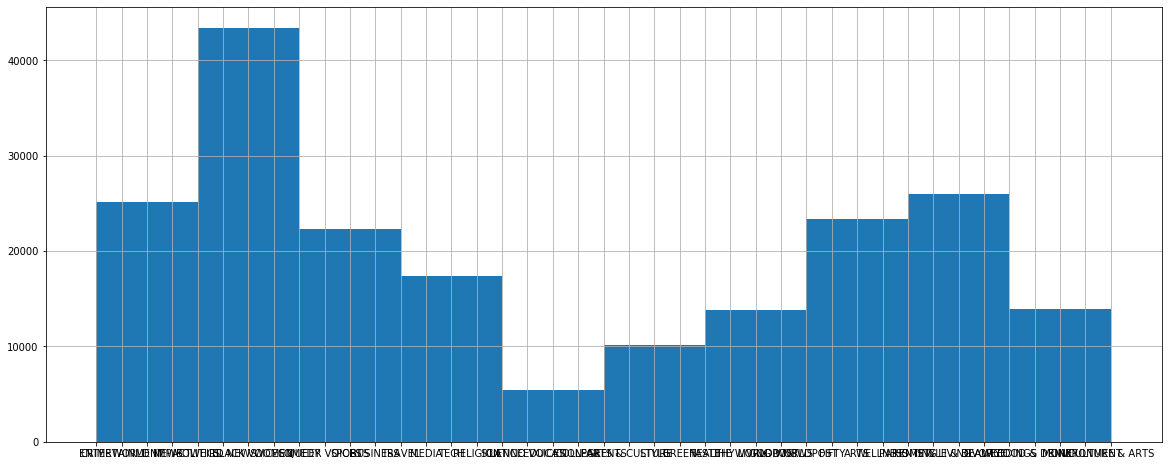

In [21]:
#class distributions
fig = plt.figure(figsize = (20,8))
ax = fig.gca()
data['category'].hist(ax = ax)

In [12]:
#class distributions
data['category'].describe()

count       200853
unique          41
top       POLITICS
freq         32739
Name: category, dtype: object

In [22]:
#class distributions
data['category'].value_counts()

POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: category, 

#### Dividing Up The Data


For this dataset, I chose to split up the data using a stratified 80-20 split. The full data will be split into train and test sets, with the train set being further split into train and validation using another 80-20 split.
I chose this method because of the relatively large size of the dataset with a total of 200853 instances. Stratification is necessary because of the unbalanced distribution of the 40 classes. The stratification will ensure that the train, test, and validation sets will have the same class ratios. 

In [39]:
from sklearn.model_selection import train_test_split

X = data['headline']
y = data['category']

#split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=.20)

#split into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, random_state=42, test_size=.20)


print("X_train shape: ", X_train.shape)
print("X_val shape: ", X_val.shape)
print("X_test shape: ", X_test.shape)

print("y_train shape: ", y_train.shape)
print("y_val shape: ", y_val.shape)
print("y_test shape: ", y_test.shape)


X_train shape:  (128545,)
X_val shape:  (32137,)
X_test shape:  (40171,)
y_train shape:  (128545,)
y_val shape:  (32137,)
y_test shape:  (40171,)


### References

- [1] https://www.kaggle.com/rmisra/news-category-dataset